In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df = pd.read_csv(r'consulta_cand_2004_2020_BRASIL.csv', delimiter=',', encoding='utf_8') 

In [3]:
df.shape

(2407292, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407292 entries, 0 to 2407291
Data columns (total 11 columns):
ANO_ELEICAO                 int64
CD_TIPO_ELEICAO             int64
NM_TIPO_ELEICAO             object
SG_UF                       object
NM_UE                       object
DS_CARGO                    object
DS_DETALHE_SITUACAO_CAND    object
SG_PARTIDO                  object
DS_GENERO                   object
DS_GRAU_INSTRUCAO           object
DS_SIT_TOT_TURNO            object
dtypes: int64(2), object(9)
memory usage: 202.0+ MB


In [5]:
df['ANO_ELEICAO'].unique()

array([2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])

In [6]:
df['DS_CARGO'].unique()

array(['PREFEITO', 'VICE-PREFEITO', 'VEREADOR', 'GOVERNADOR',
       'VICE-GOVERNADOR', 'SENADOR', 'DEPUTADO FEDERAL',
       'DEPUTADO ESTADUAL', '1º SUPLENTE SENADOR', '2º SUPLENTE SENADOR',
       'PRESIDENTE', 'VICE-PRESIDENTE',
       'VOCÊ É A FAVOR | DA CRIAÇÃO DO MUNICÍPIO DE | EXTREMA DE RONDÔNIA?',
       'VOCÊ É A FAVOR DA | ALTERAÇÃO DO NOME | DA CIDADE DE EMBU" | PARA "EMBU DAS ARTES"?"',
       'DEPUTADO DISTRITAL', '1º SUPLENTE', '2º SUPLENTE'], dtype=object)

In [7]:
df['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO', 'NÃO INFORMADO', '6', '8',
       'NÃO DIVULGÁVEL'], dtype=object)

In [8]:
df.isnull().sum()

ANO_ELEICAO                 0
CD_TIPO_ELEICAO             0
NM_TIPO_ELEICAO             0
SG_UF                       0
NM_UE                       0
DS_CARGO                    0
DS_DETALHE_SITUACAO_CAND    0
SG_PARTIDO                  0
DS_GENERO                   0
DS_GRAU_INSTRUCAO           0
DS_SIT_TOT_TURNO            3
dtype: int64

In [9]:
df.head()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_SIT_TOT_TURNO
0,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PTB,MASCULINO,FUNDAMENTAL INCOMPLETO,NÃO ELEITO
1,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PT,MASCULINO,FUNDAMENTAL COMPLETO,NÃO ELEITO
2,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PSDB,MASCULINO,SUPERIOR COMPLETO,ELEITO
3,2004,1,ELEICOES 2004,AC,ACRELANDIA,VICE-PREFEITO,DEFERIDO,PMDB,MASCULINO,FUNDAMENTAL COMPLETO,#NULO#
4,2004,1,ELEICOES 2004,AC,ACRELANDIA,VICE-PREFEITO,DEFERIDO,PTB,MASCULINO,SUPERIOR COMPLETO,#NULO#


In [10]:
df.drop(df[df['DS_CARGO'] == 'VOCÊ É A FAVOR | DA CRIAÇÃO DO MUNICÍPIO DE | EXTREMA DE RONDÔNIA?'].index, inplace=True)
df.drop(df[df['DS_CARGO'] == 'VOCÊ É A FAVOR DA | ALTERAÇÃO DO NOME | DA CIDADE DE EMBU" | PARA "EMBU DAS ARTES"?"'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == '6'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == '8'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == 'NÃO DIVULGÁVEL'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == 'NÃO INFORMADO'].index, inplace=True)

In [11]:
df['DS_CARGO'].unique()

array(['PREFEITO', 'VICE-PREFEITO', 'VEREADOR', 'GOVERNADOR',
       'VICE-GOVERNADOR', 'SENADOR', 'DEPUTADO FEDERAL',
       'DEPUTADO ESTADUAL', '1º SUPLENTE SENADOR', '2º SUPLENTE SENADOR',
       'PRESIDENTE', 'VICE-PRESIDENTE', 'DEPUTADO DISTRITAL',
       '1º SUPLENTE', '2º SUPLENTE'], dtype=object)

In [12]:
df['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [13]:
df.head()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_SIT_TOT_TURNO
0,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PTB,MASCULINO,FUNDAMENTAL INCOMPLETO,NÃO ELEITO
1,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PT,MASCULINO,FUNDAMENTAL COMPLETO,NÃO ELEITO
2,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PSDB,MASCULINO,SUPERIOR COMPLETO,ELEITO
3,2004,1,ELEICOES 2004,AC,ACRELANDIA,VICE-PREFEITO,DEFERIDO,PMDB,MASCULINO,FUNDAMENTAL COMPLETO,#NULO#
4,2004,1,ELEICOES 2004,AC,ACRELANDIA,VICE-PREFEITO,DEFERIDO,PTB,MASCULINO,SUPERIOR COMPLETO,#NULO#


<AxesSubplot:title={'center':'Porcentagem Mulheres x Homens nas Eleições - Por Cargo'}, xlabel='DS_CARGO'>

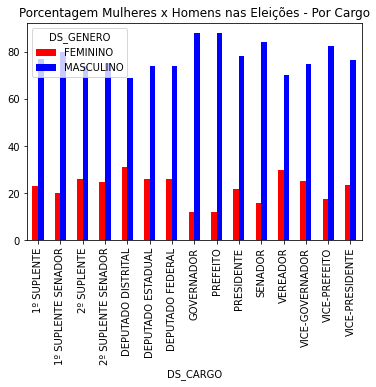

In [14]:
cargo_sexo = pd.crosstab(df['DS_CARGO'],df['DS_GENERO']).apply(lambda r: r/r.sum(), axis=1) * 100
cargo_sexo.plot(kind='bar',width=0.5, color=['red','blue', 'green', 'black', 'purple', 'pink'], title='Porcentagem Mulheres x Homens nas Eleições - Por Cargo')

In [15]:
cargo_sexo 

DS_GENERO,FEMININO,MASCULINO
DS_CARGO,,
1º SUPLENTE,22.809917,77.190083
1º SUPLENTE SENADOR,20.000000,80.000000
2º SUPLENTE,26.171244,73.828756
2º SUPLENTE SENADOR,24.910394,75.089606
DEPUTADO DISTRITAL,31.125498,68.874502
DEPUTADO ESTADUAL,26.079038,73.920962
DEPUTADO FEDERAL,26.133621,73.866379
GOVERNADOR,11.990687,88.009313
PREFEITO,12.169083,87.830917


<AxesSubplot:ylabel='DS_GENERO'>

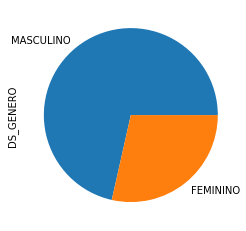

In [16]:
#Gráfico para visualizar a distribuição do gênero.
df['DS_GENERO'].value_counts().plot.pie()

<AxesSubplot:title={'center':'Porcentagem Mulheres x Homens nas Eleições - Por Cargo'}, xlabel='SG_UF'>

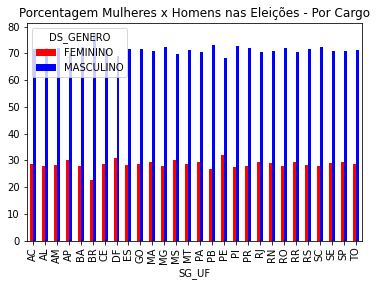

In [17]:
estado_sexo = pd.crosstab(df['SG_UF'],df['DS_GENERO']).apply(lambda r: r/r.sum(), axis=1) * 100
estado_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Porcentagem Mulheres x Homens nas Eleições - Por Cargo')

In [18]:
estado_sexo

DS_GENERO,FEMININO,MASCULINO
SG_UF,,
AC,28.478990,71.521010
AL,27.954987,72.045013
AM,28.180957,71.819043
AP,30.021482,69.978518
BA,27.787674,72.212326
BR,22.549020,77.450980
CE,28.455800,71.544200
DF,30.819140,69.180860
ES,28.303792,71.696208


<AxesSubplot:title={'center':'Porcentagem Mulheres x Homens nas Eleições - Por Cargo'}, xlabel='DS_SIT_TOT_TURNO'>

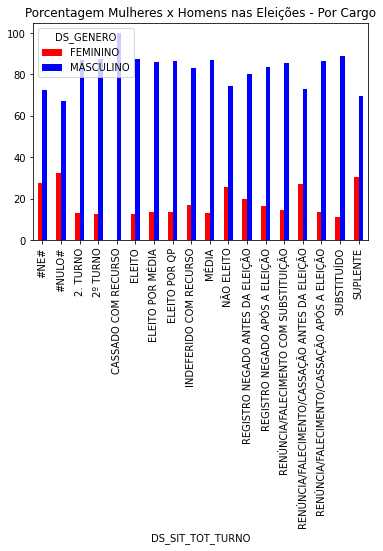

In [19]:
eleito_sexo = pd.crosstab(df['DS_SIT_TOT_TURNO'],df['DS_GENERO']).apply(lambda r: r/r.sum(), axis=1) * 100
eleito_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Porcentagem Mulheres x Homens nas Eleições - Por Cargo')

In [20]:
eleito_sexo

DS_GENERO,FEMININO,MASCULINO
DS_SIT_TOT_TURNO,,
#NE#,27.384292,72.615708
#NULO#,32.593059,67.406941
2. TURNO,12.980769,87.019231
2º TURNO,12.592593,87.407407
CASSADO COM RECURSO,0.000000,100.000000
ELEITO,12.432547,87.567453
ELEITO POR MÉDIA,13.766051,86.233949
ELEITO POR QP,13.351057,86.648943
INDEFERIDO COM RECURSO,16.808511,83.191489


In [21]:
feminino = df[df['DS_GENERO'] == 'FEMININO']

In [22]:
feminino['DS_CARGO'].unique()

array(['VEREADOR', 'VICE-PREFEITO', 'PREFEITO', 'VICE-GOVERNADOR',
       'SENADOR', 'DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL', 'GOVERNADOR',
       '1º SUPLENTE SENADOR', '2º SUPLENTE SENADOR', 'PRESIDENTE',
       'VICE-PRESIDENTE', '1º SUPLENTE', '2º SUPLENTE',
       'DEPUTADO DISTRITAL'], dtype=object)

In [23]:
feminino.head()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_SIT_TOT_TURNO
6,2004,1,ELEICOES 2004,AC,ACRELANDIA,VEREADOR,DEFERIDO,PSDB,FEMININO,MÉDIO COMPLETO,ELEITO
8,2004,1,ELEICOES 2004,AC,ACRELANDIA,VEREADOR,INDEFERIDO,PMDB,FEMININO,FUNDAMENTAL INCOMPLETO,#NULO#
10,2004,1,ELEICOES 2004,AC,ACRELANDIA,VEREADOR,DEFERIDO,PDT,FEMININO,SUPERIOR COMPLETO,ELEITO
29,2004,1,ELEICOES 2004,AC,ACRELANDIA,VEREADOR,DEFERIDO,PC do B,FEMININO,MÉDIO COMPLETO,SUPLENTE
36,2004,1,ELEICOES 2004,AC,ACRELANDIA,VEREADOR,DEFERIDO,PT,FEMININO,MÉDIO COMPLETO,SUPLENTE


In [24]:
a = pd.DataFrame(df.query('DS_CARGO == "VEREADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
b = pd.DataFrame(df.query('DS_CARGO == "VEREADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [25]:
a = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO ESTADUAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
b = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO ESTADUAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [26]:
# Concatena os dataframes criados acima
vereadora_fem = pd.concat([a, b])

In [27]:
vereadora_estado = pd.crosstab(vereadora_fem['DS_SIT_TOT_TURNO'], vereadora_fem['SG_UF']).T
vereadora_estado['TOTAL'] = vereadora_estado['ELEITO'] + vereadora_estado['NÃO ELEITO']

In [28]:
vereadora_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO,TOTAL
SG_UF,,,
PB,20,54,74
RJ,19,210,229
BA,18,83,101
SP,18,296,314
MA,13,57,70
RS,12,112,124
MG,11,67,78
PA,11,92,103
PI,10,53,63


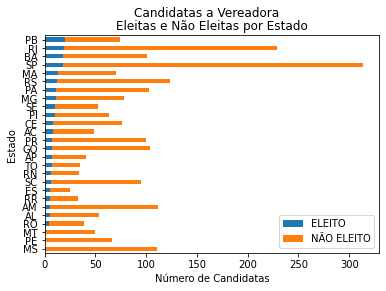

In [29]:
vereadora_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Vereadora")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [30]:
c = pd.DataFrame(df.query('DS_CARGO == "PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
d = pd.DataFrame(df.query('DS_CARGO == "PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

e = pd.DataFrame(df.query('DS_CARGO == "VICE-PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
f = pd.DataFrame(df.query('DS_CARGO == "VICE-PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [31]:
# Concatena os dataframes criados acima
prefeita_fem = pd.concat([c, d, e, f])

In [32]:
prefeita_estado = pd.crosstab(prefeita_fem['DS_SIT_TOT_TURNO'], prefeita_fem['SG_UF']).T
prefeita_estado['TOTAL'] = prefeita_estado['ELEITO'] + prefeita_estado['NÃO ELEITO']

In [33]:
prefeita_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO,TOTAL
SG_UF,,,
SP,437,1322,1759
MG,406,1012,1418
PB,386,599,985
BA,337,685,1022
RN,235,316,551
MA,234,545,779
PR,228,519,747
RS,202,535,737
CE,190,344,534


In [34]:
prefeita_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO,TOTAL
SG_UF,,,
SP,437,1322,1759
MG,406,1012,1418
PB,386,599,985
BA,337,685,1022
RN,235,316,551
MA,234,545,779
PR,228,519,747
RS,202,535,737
CE,190,344,534


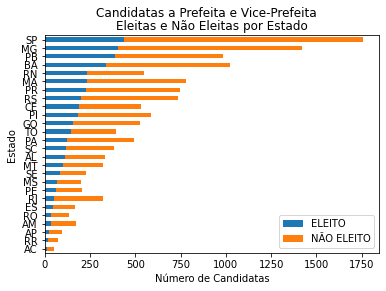

In [35]:
prefeita_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Prefeita e Vice-Prefeita")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [36]:
g = pd.DataFrame(df.query('DS_CARGO == "GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
h = pd.DataFrame(df.query('DS_CARGO == "GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

i = pd.DataFrame(df.query('DS_CARGO == "VICE-GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
j = pd.DataFrame(df.query('DS_CARGO == "VICE-GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [37]:
# Concatena os dataframes criados acima
governadora_fem = pd.concat([g, h, i, j])

In [38]:
governadora_estado = pd.crosstab(governadora_fem['DS_SIT_TOT_TURNO'], governadora_fem['SG_UF']).T
governadora_estado['TOTAL'] = governadora_estado['ELEITO'] + governadora_estado['NÃO ELEITO']

In [39]:
governadora_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO,TOTAL
SG_UF,,,
RN,3,4,7
CE,2,6,8
PB,2,8,10
PI,2,11,13
AC,1,3,4
ES,1,7,8
MA,1,7,8
MS,1,6,7
PA,1,5,6


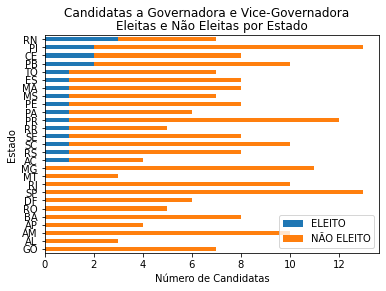

In [40]:
governadora_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Governadora e Vice-Governadora")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [41]:
k = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO ESTADUAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
l = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO ESTADUAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [42]:
# Concatena os dataframes criados acima
dep_estadual_fem = pd.concat([k, l])

In [43]:
dep_estadual_estado = pd.crosstab(dep_estadual_fem['DS_SIT_TOT_TURNO'],dep_estadual_fem['SG_UF']).T
dep_estadual_estado['TOTAL'] = dep_estadual_estado['ELEITO'] + dep_estadual_estado['NÃO ELEITO']

In [44]:
dep_estadual_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO,TOTAL
SG_UF,,,
PB,20,54,74
RJ,19,210,229
BA,18,83,101
SP,18,296,314
MA,13,57,70
RS,12,112,124
MG,11,67,78
PA,11,92,103
PI,10,53,63


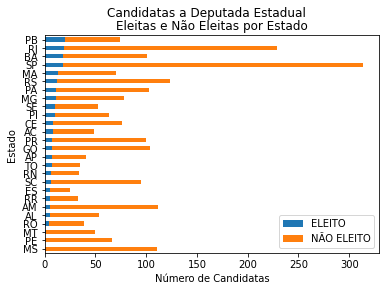

In [45]:
dep_estadual_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Deputada Estadual")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [46]:
m = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO FEDERAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
n = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO FEDERAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [47]:
# Concatena os dataframes criados acima
dep_federal_fem = pd.concat([m, n])

In [48]:
dep_federal_estado = pd.crosstab(dep_federal_fem['DS_SIT_TOT_TURNO'],dep_federal_fem['SG_UF']).T
dep_federal_estado['TOTAL'] = dep_federal_estado['ELEITO'] + dep_federal_estado['NÃO ELEITO']

In [49]:
dep_federal_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO,TOTAL
SG_UF,,,
RJ,9,175,184
SP,9,373,382
AP,7,20,27
ES,6,44,50
BA,5,100,105
RS,5,76,81
GO,4,44,48
AC,3,15,18
MG,3,78,81


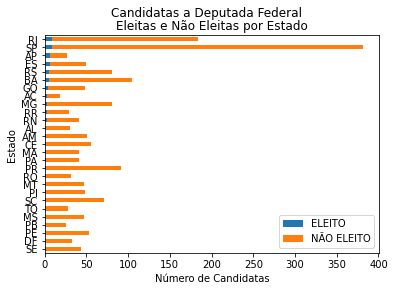

In [50]:
dep_federal_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Deputada Federal")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [51]:
o = pd.DataFrame(df.query('DS_CARGO == "SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
p = pd.DataFrame(df.query('DS_CARGO == "SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

q = pd.DataFrame(df.query('DS_CARGO == "1º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
r = pd.DataFrame(df.query('DS_CARGO == "1º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

s = pd.DataFrame(df.query('DS_CARGO == "2º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
t = pd.DataFrame(df.query('DS_CARGO == "2º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [52]:
# Concatena os dataframes criados acima
senadora_fem = pd.concat([o, p, q, r, s, t])

In [53]:
senadora_estado = pd.crosstab(senadora_fem['DS_SIT_TOT_TURNO'],senadora_fem['SG_UF']).T
senadora_estado['TOTAL'] = senadora_estado['ELEITO'] + senadora_estado['NÃO ELEITO']

In [54]:
senadora_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO,TOTAL
SG_UF,,,
MS,3,1,4
RN,3,7,10
SE,2,2,4
SP,2,11,13
TO,2,1,3
AM,1,3,4
BA,1,2,3
DF,1,2,3
ES,1,3,4


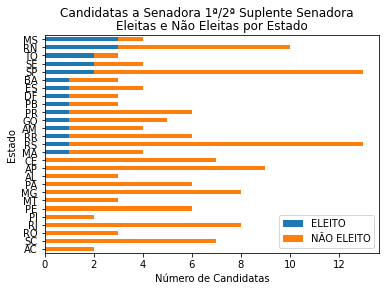

In [55]:
senadora_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Senadora 1ª/2ª Suplente Senadora")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [56]:
u = pd.DataFrame(df.query('DS_CARGO == "PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
v = pd.DataFrame(df.query('DS_CARGO == "PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

x = pd.DataFrame(df.query('DS_CARGO == "VICE-PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
z = pd.DataFrame(df.query('DS_CARGO == "VICE-PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [57]:
# Concatena os dataframes criados acima
presidenta_fem = pd.concat([u, v, x, z])

In [58]:
presidenta_fem.columns

Index(['ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'SG_UF', 'NM_UE',
       'DS_CARGO', 'DS_DETALHE_SITUACAO_CAND', 'SG_PARTIDO', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [59]:
presidenta_estado = pd.crosstab(presidenta_fem['DS_SIT_TOT_TURNO'],presidenta_fem['ANO_ELEICAO']).T

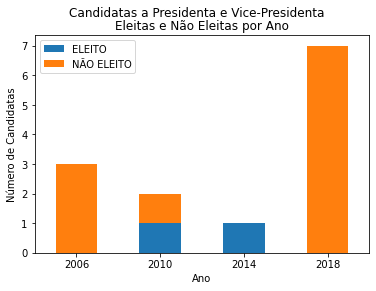

In [60]:
presidenta_estado.plot.bar(stacked=True, rot=0)
plt.suptitle("Candidatas a Presidenta e Vice-Presidenta")
plt.title("Eleitas e Não Eleitas por Ano")
plt.xlabel('Ano');
plt.ylabel('Número de Candidatas');
plt.legend();

In [61]:
feminino.columns

Index(['ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'SG_UF', 'NM_UE',
       'DS_CARGO', 'DS_DETALHE_SITUACAO_CAND', 'SG_PARTIDO', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [62]:
candidata_eleitas = pd.DataFrame(feminino.query('DS_SIT_TOT_TURNO == "ELEITO"'))
candidata_eleitas = pd.crosstab(candidata_eleitas['ANO_ELEICAO'],candidata_eleitas['SG_UF']).T
candidata_eleitas.head(28)

ANO_ELEICAO,2004,2006,2008,2010,2012,2014,2016,2018
SG_UF,,,,,,,,
AC,21,6,23,5,3,2,6,2
AL,125,3,149,4,40,1,37,2
AM,58,4,50,4,14,0,11,2
AP,19,6,23,8,10,0,7,1
BA,421,11,429,13,137,1,115,2
BR,0,0,0,1,0,1,0,0
CE,234,3,260,7,77,1,71,1
DF,0,0,0,0,0,0,0,3
ES,44,6,58,5,19,1,12,3


In [63]:
candidatas_estado = pd.crosstab(feminino['ANO_ELEICAO'],feminino['SG_UF']).T
candidatas_estado.head(28)

ANO_ELEICAO,2004,2006,2008,2010,2012,2014,2016,2018,2020
SG_UF,,,,,,,,,
AC,297,85,286,90,736,196,739,188,1036
AL,1413,50,1507,101,2487,142,2318,148,2491
AM,1199,84,1349,160,2472,240,3007,265,3421
AP,285,70,357,129,626,171,629,222,865
BA,6072,102,6066,165,11377,342,11713,372,13554
BR,0,3,0,4,0,8,0,8,0
CE,2598,113,2411,224,4671,271,4734,284,5331
DF,0,0,0,0,0,371,0,389,0
ES,1628,76,1383,69,3127,247,3302,261,4199


In [64]:
feminicidio = pd.read_csv(r'feminicidio.csv', delimiter=';', encoding='utf_8')

In [65]:
feminicidio.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS
0,2006,AC,15,6
1,2006,AL,106,3
2,2006,AM,13,4
3,2006,AP,53,6
4,2006,BA,243,11


In [66]:
# Habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Definindo o renderizador:
import plotly.io as pio
pio.renderers


import plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from itertools import cycle

from plotly.validators.scatter.marker import SymbolValidator

In [67]:
fem_br = pd.DataFrame(feminicidio.query('SG_UF == "BR"'))

In [89]:
fem_br.corr()

,ANO,FEMINICIDIO,CANDIDATAS_ELEITAS
ANO,1.000000,0.962693,0.577350
FEMINICIDIO,0.962693,1.000000,0.568071
CANDIDATAS_ELEITAS,0.577350,0.568071,1.000000


In [68]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_br, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio ao longo do tempo')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [69]:
fem_estados = pd.DataFrame(feminicidio.query('SG_UF != "BR"'))

In [70]:
fem_estados.nlargest(10,["FEMINICIDIO"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS
25,2006,SP,788,13
81,2010,SP,678,15
53,2008,SP,667,536
109,2012,SP,640,187
137,2014,SP,612,0
19,2006,RJ,504,15
131,2014,RJ,464,0
97,2012,MT,460,44
60,2010,BA,438,13
88,2012,BA,437,137


In [71]:
fem_estados.nsmallest(10,["FEMINICIDIO"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS
79,2010,RR,11,4
2,2006,AM,13,4
23,2006,RR,13,5
28,2008,AC,13,23
30,2008,AM,13,50
0,2006,AC,15,6
51,2008,RR,15,12
58,2010,AM,16,4
84,2012,AC,16,3
86,2012,AM,17,14


In [72]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_estados, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio ao longo do tempo')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [73]:
fem_norte = feminicidio[feminicidio['SG_UF'].isin(['AC', 'AM', 'RO', 'RR', 'PA', 'TO'])]
fem_nordeste = feminicidio[feminicidio['SG_UF'].isin(['AL', 'BA', 'CE', 'MA', 'PB', 'PI', 'PE', 'RN', 'SE'])]
fem_centro = feminicidio[feminicidio['SG_UF'].isin(['GO', 'MS', 'MT'])]
fem_sudeste = feminicidio[feminicidio['SG_UF'].isin(['ES', 'MG', 'RJ', 'SP'])]
fem_sul = feminicidio[feminicidio['SG_UF'].isin(['PR', 'RS', 'SC'])]

In [74]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_norte, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Norte do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [75]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_nordeste, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Nordeste do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [76]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_centro, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Centro-Oeste do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [77]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_sudeste, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Sudeste do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [78]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_sul, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Sul do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [79]:
fem_sampa = pd.DataFrame(feminicidio.query('SG_UF == "SP"'))
fem_sampa.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS
25,2006,SP,788,13
53,2008,SP,667,536
81,2010,SP,678,15
109,2012,SP,640,187
137,2014,SP,612,0


In [80]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas Eleitas no Estado de São Paulo',
                                 yaxis={'title':'Taxa em %'},
                                 xaxis={'title': 'Período'})

fem_sp = go.Scatter(x=fem_sampa['ANO'], 
                y=fem_sampa['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de SP',
                        line = dict(color = '#17BECF'))

cand_sp = go.Scatter(x=fem_sampa['ANO'], 
                        y=fem_sampa['CANDIDATAS_ELEITAS'],                    
                        name = 'Candidatas Eleitas no Estado de SP',
                        line = dict(color = '#7F7F7F'))

data = [fem_sp, cand_sp]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

In [81]:
fem_roraima = pd.DataFrame(feminicidio.query('SG_UF == "RR"'))
fem_roraima.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS
23,2006,RR,13,5
51,2008,RR,15,12
79,2010,RR,11,4
107,2012,RR,17,6
135,2014,RR,24,1


In [82]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas Eleitas no Estado de Roraima',
                                 yaxis={'title':'Taxa em %'},
                                 xaxis={'title': 'Período'})

fem_rr = go.Scatter(x=fem_roraima['ANO'], 
                y=fem_roraima['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de RR',
                        line = dict(color = '#17BECF'))

cand_rr = go.Scatter(x=fem_roraima['ANO'], 
                        y=fem_roraima['CANDIDATAS_ELEITAS'],                    
                        name = 'Candidatas Eleitas no Estado de RR',
                        line = dict(color = '#7F7F7F'))

data = [fem_rr, cand_rr]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

In [83]:
fem_maranhao = pd.DataFrame(feminicidio.query('SG_UF == "MA"'))
fem_maranhao.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS
10,2006,MA,67,7
38,2008,MA,81,281
66,2010,MA,117,9
94,2012,MA,114,89
122,2014,MA,152,0


In [84]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas Eleitas no Estado do Maranhão',
                                 yaxis={'title':'Taxa em %'},
                                 xaxis={'title': 'Período'})

fem_ma = go.Scatter(x=fem_maranhao['ANO'], 
                y=fem_maranhao['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de MA',
                        line = dict(color = '#17BECF'))

cand_ma = go.Scatter(x=fem_maranhao['ANO'], 
                        y=fem_maranhao['CANDIDATAS_ELEITAS'],                    
                        name = 'Candidatas Eleitas no Estado de MA',
                        line = dict(color = '#7F7F7F'))

data = [fem_ma, cand_ma]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

In [88]:
feminicidio.corr()

,ANO,FEMINICIDIO,CANDIDATAS_ELEITAS
ANO,1.000000,0.028926,-0.187109
FEMINICIDIO,0.028926,1.000000,-0.066301
CANDIDATAS_ELEITAS,-0.187109,-0.066301,1.000000
